[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Change point detection

In [1]:
pip install ruptures

     |████████████████████████████████| 388 kB 4.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

In [45]:
import numpy as np
import ruptures as rpt
signal, bkps = rpt.pw_constant(
    n_samples=500, n_features=3, n_bkps=2,
    noise_std=5.0, delta=(1, 20)
)

(<Figure size 720x432 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

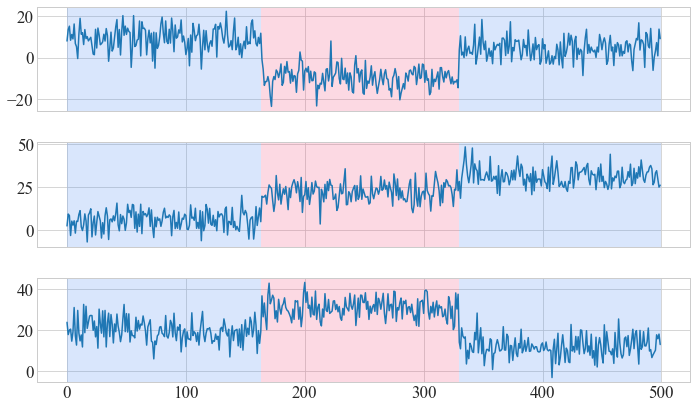

In [46]:
rpt.display(signal, bkps)

In [7]:
signal.shape

(500, 3)

In [33]:
bkps 

[123, 251, 378, 500]

(<Figure size 720x432 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

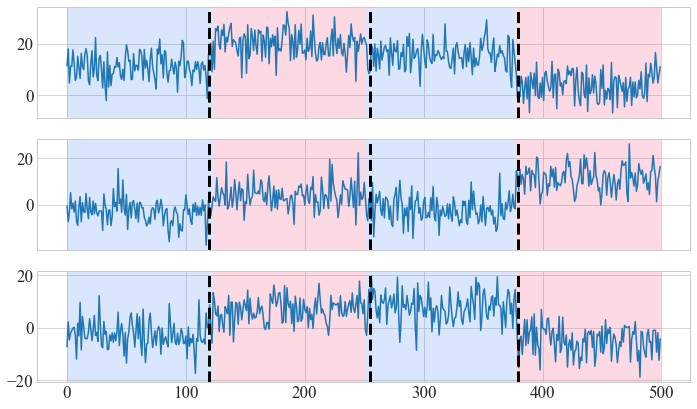

In [32]:
# "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model="l1").fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))

# Anomaly detection

In [36]:
pip install alibi_detect

     |████████████████████████████████| 150 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 2.3 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 12.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [50]:
from alibi_detect.datasets import fetch_kdd

intrusions = fetch_kdd()

In [57]:
intrusions['target'].sum() / len(intrusions['target'])

0.8030893423558918

In [59]:
intrusions['feature_names']

['srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [126]:
from alibi_detect.od import SpectralResidual

od = SpectralResidual(
    threshold=1.,
    window_amp=20,
    window_local=20,
    n_est_points=10,
    n_grad_points=5
)
intrusion_outliers = od.predict(intrusions['data'])

In [88]:
scores = od.score(intrusions['data'][:, 0])

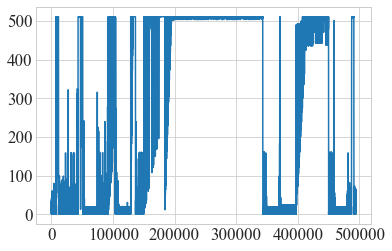

In [128]:
import pandas as pd
pd.Series(intrusions['data'][:, 0]).plot();

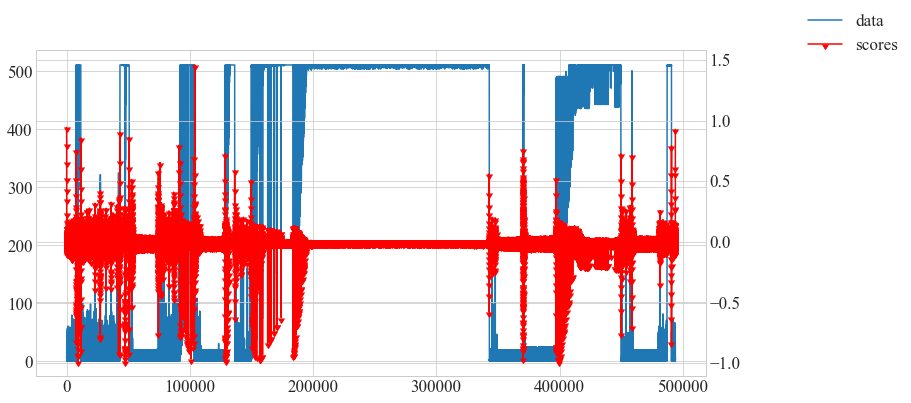

In [134]:
import matplotlib

ax = pd.Series(intrusions['data'][:, 0], name='data').plot(legend=False, figsize=(12, 6))
ax2 = ax.twinx()
ax = pd.Series(scores, name='scores').plot(ax=ax2, legend=False, color="r", marker=matplotlib.markers.CARETDOWNBASE)
ax.figure.legend(bbox_to_anchor=(1, 1), loc='upper left');